In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part 5
Open the data from DataPart5.csv and model it using an ARMA model, increasing the model order assisted by the ACF and PACF, until the residuals look white. When you are reasonably satisfied compute the LDF of the residuals. Do you find any significant non-linearities? Propose a better model structure.


Hints
Check the n-step residuals versus residuals plot, where n is the significant LDF lag, i.e. et versus et−n. R: The script ldf.R is a way to estimate lagged dependent functions. Matlab: The script in ldf.m does an estimation of Lagged Dependent Functions. The script in ldfone.m can be used to see the estimated dependence function for some lag

In [53]:
# Load the data
df5 = pd.read_csv('DataPart5.csv')
df5

,x
0,0.000000
1,0.000000
2,0.043702
3,0.244185
4,0.228373
...,...
795,-2.924054
796,0.090884
797,3.260501
798,1.342104


In [54]:
from scipy import stats
data5 = df5['x'].values

# Compute summary statistics for the complete dataset
n = len(data5)
mean_val = np.mean(data5)
std_val = np.std(data5, ddof=1)  # Sample standard deviation
min_val = np.min(data5)
max_val = np.max(data5)
median_val = np.median(data5)
q25 = np.percentile(data5, 25)
q75 = np.percentile(data5, 75)
skewness = stats.skew(data5)
kurtosis = stats.kurtosis(data5, fisher=True)  # Excess kurtosis

print(f"Summary Statistics for DataPart5.csv (n={n}):")
print(f"Mean: {mean_val:.3f}")
print(f"Standard Deviation: {std_val:.3f}")
print(f"Minimum: {min_val:.3f}")
print(f"Maximum: {max_val:.3f}")
print(f"Median: {median_val:.3f}")
print(f"25th Percentile: {q25:.3f}")
print(f"75th Percentile: {q75:.3f}")
print(f"Skewness: {skewness:.3f}")
print(f"Excess Kurtosis: {kurtosis:.3f}")

# Also show first 20 values for the data sample table
print("\nFirst 20 observations:")
for i in range(20):
    print(f"{i}: {data5[i]:.3f}")

Summary Statistics for DataPart5.csv (n=800):
Mean: 2.232
Standard Deviation: 2.094
Minimum: -5.062
Maximum: 7.907
Median: 2.013
25th Percentile: 0.961
75th Percentile: 3.591
Skewness: 0.007
Excess Kurtosis: 0.325

First 20 observations:
0: 0.000
1: 0.000
2: 0.044
3: 0.244
4: 0.228
5: 0.818
6: 0.896
7: 2.427
8: 3.557
9: 1.071
10: 2.315
11: 4.373
12: 0.631
13: 2.574
14: 2.552
15: 1.427
16: 1.232
17: 4.682
18: 5.074
19: 2.817


In [55]:
# Try different ARMA models and select based on AIC/BIC
from statsmodels.tsa.arima.model import ARIMA

models_to_try = [(0,0,0), (1,0,0), (0,0,1), (1,0,1), (2,0,0), (0,0,2), (2,0,1), (1,0,2), (2,0,2), (3,0,0), (0,0,3)]
results = {}

for p, d, q in models_to_try:
    try:
        model = ARIMA(data5, order=(p,d,q))
        fitted_model = model.fit()
        results[(p,d,q)] = {
            'aic': fitted_model.aic,
            'bic': fitted_model.bic,
            'model': fitted_model
        }
        print(f"ARMA({p},{q}): AIC={fitted_model.aic:.2f}, BIC={fitted_model.bic:.2f}")
    except:
        print(f"ARMA({p},{q}): Failed to converge")

# Select best model based on AIC
best_order = min(results.keys(), key=lambda x: results[x]['aic'])
worst_order = max(results.keys(), key=lambda x: results[x]['aic'])
best_model = results[best_order]['model']
worst_model = results[worst_order]['model']
print(f"\nBest model: ARMA{best_order} with AIC={results[best_order]['aic']:.2f}")

ARMA(0,0): AIC=3455.98, BIC=3465.35
ARMA(1,0): AIC=3457.08, BIC=3471.13
ARMA(0,1): AIC=3456.44, BIC=3470.50
ARMA(1,1): AIC=3448.99, BIC=3467.72
ARMA(2,0): AIC=3422.79, BIC=3441.53
ARMA(0,2): AIC=3423.65, BIC=3442.39
ARMA(2,1): AIC=3423.22, BIC=3446.64
ARMA(1,2): AIC=3422.71, BIC=3446.14
ARMA(2,2): AIC=3424.34, BIC=3452.45
ARMA(3,0): AIC=3423.67, BIC=3447.09
ARMA(0,3): AIC=3422.08, BIC=3445.51

Best model: ARMA(0, 0, 3) with AIC=3422.08


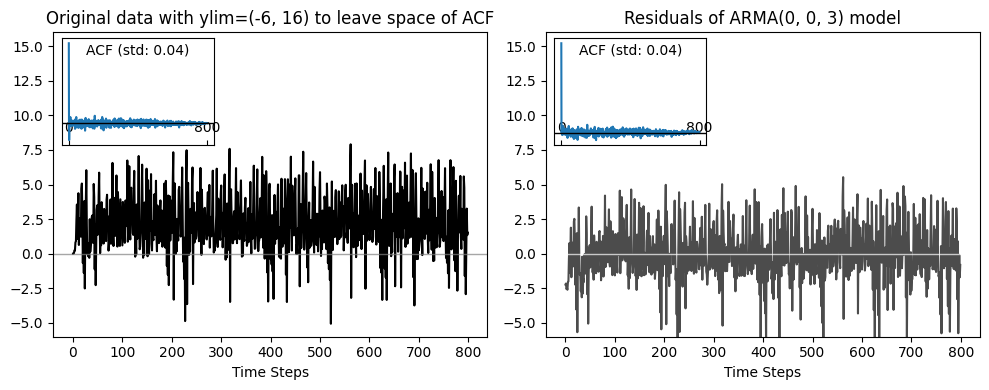

In [56]:
from statsmodels.tsa.stattools import acf
import numpy as np

# Analyze residuals of the best model
residuals = best_model.resid
fitted_values = best_model.fittedvalues

data5 = df5['x'].values
length = len(data5)
acf_data = acf(data5, nlags=length, fft=True)

residuals_length = len(residuals)
acf_residuals = acf(residuals, nlags=residuals_length, fft=True)

# Create figure with first two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Left: Original data with ACF inset
ax1.plot(data5, color='black')
ax1.set_ylim(-6, 16)
ax1.axhline(y=0, color='gray', linestyle='-', linewidth=1, alpha=0.7)
ax1.set_title(f'Original data with ylim=(-6, 16) to leave space of ACF')
# ax1.set_ylabel('')
ax1.set_xlabel('Time Steps')

ax_acf1 = ax1.inset_axes([0.02, 0.63, 0.35, 0.35])
ax_acf1.plot(acf_data)
ax_acf1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax_acf1.set_xticks([0, length])
ax_acf1.tick_params(axis='x', direction="in", pad=-17, labelrotation=0)
ax_acf1.set_yticks([])
ax_acf1.set_xlabel('')
ax_acf1.text(0.5, 0.95, f'ACF (std: {np.std(acf_data):.2f})', transform=ax_acf1.transAxes, ha='center', va='top')

# Right: Residuals with ACF inset
ax2.plot(residuals, color='black', alpha=0.7)
ax2.set_ylim(-6, 16)
ax2.set_xlabel('Time Steps')
ax2.axhline(y=0, color='white', linestyle='-', linewidth=1, alpha=0.7)
ax2.set_title(f'Residuals of ARMA{best_order} model')

ax_acf2 = ax2.inset_axes([0.02, 0.63, 0.35, 0.35])
ax_acf2.plot(acf_residuals)
ax_acf2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax_acf2.set_xticks([0, residuals_length])
ax_acf2.tick_params(axis='x', direction="in", pad=-17, labelrotation=0)
ax_acf2.set_yticks([])
ax_acf2.set_xlabel('')
ax_acf2.text(0.5, 0.95, f'ACF (std: {np.std(acf_residuals):.2f})', transform=ax_acf2.transAxes, ha='center', va='top')

plt.tight_layout()
plt.savefig(f'plots/part5_data_residuals_acf')
plt.show()

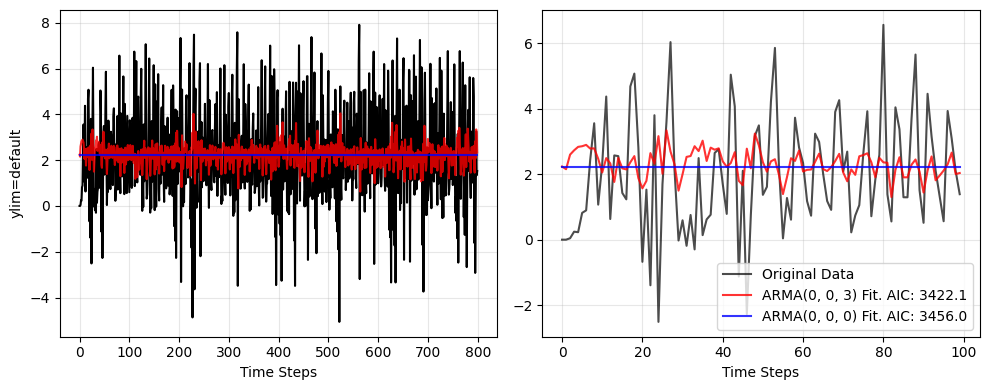

In [57]:
# From your results, identify best and worst models
best_order = (0, 0, 3)  # MA(3) with AIC=3422.08
worst_order = (0, 0, 0)  # White noise with AIC=3455.98

# Fit both models
best_model = ARIMA(data5, order=best_order).fit()
worst_model = ARIMA(data5, order=worst_order).fit()

# Get fitted values and residuals
best_fitted = best_model.fittedvalues
best_residuals = best_model.resid
worst_fitted = worst_model.fittedvalues
worst_residuals = worst_model.resid

# Create comparison plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(data5, 'k-', label='Original Data')
axes[0].plot(best_fitted, 'r-', alpha=0.8, label=f'ARMA{best_order} Fit')
axes[0].plot(worst_fitted, 'b-', alpha=0.8, label=f'ARMA{worst_order} Fit')
# axes[0].set_title('Original Data vs Best and Worst Model Predictions')
axes[0].set_xlabel('Time Steps')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylabel('ylim=default')


zoom_range = slice(0, 100)
axes[1].plot(data5[zoom_range], 'k-', alpha=0.7, label='Original Data')
axes[1].plot(best_fitted[zoom_range], 'r-', alpha=0.8, label=f'ARMA{best_order} Fit. AIC: {best_model.aic:.1f}')
axes[1].plot(worst_fitted[zoom_range], 'b-', alpha=0.8, label=f'ARMA{worst_order} Fit. AIC: {worst_model.aic:.1f}')
# axes[1].set_title('First 100 predictions')
axes[1].set_xlabel('Time Steps')
# axes[1].set_ylabel('Value')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'plots/part5_original_data_vs_fitted_values')
plt.show()

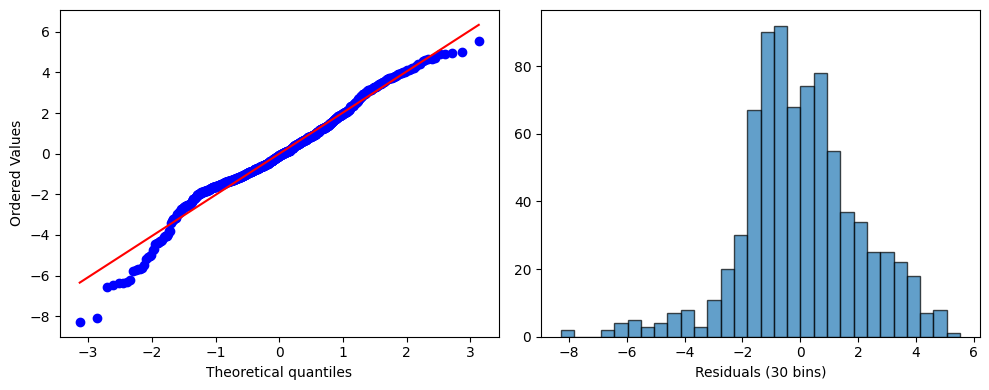

In [58]:
# Create figure with Q-Q plot and histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=ax1)
ax1.set_title('')
ax2.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
ax2.set_xlabel('Residuals (30 bins)')
# ax2.set_title('Distribution of Residuals')

plt.tight_layout()
plt.savefig(f'plots/part5_acf_and_residuals')
plt.show()

In [59]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test_residuals = acorr_ljungbox(residuals, lags=10, return_df=True)
print("Ljung-Box Test for ARMA(0,0,3) Residuals (H0: residuals are white noise):")
print(lb_test_residuals)

Ljung-Box Test for ARMA(0,0,3) Residuals (H0: residuals are white noise):
     lb_stat  lb_pvalue
1   0.000537   0.981506
2   0.004001   0.998001
3   0.049262   0.997135
4   0.368302   0.984989
5   0.998083   0.962720
6   1.131125   0.980150
7   1.273788   0.989128
8   1.351146   0.994912
9   5.964475   0.743468
10  5.998549   0.815385


In [60]:
# Test on original data for comparison
lb_test_original = acorr_ljungbox(data5, lags=10, return_df=True)
print("Ljung-Box Test for Original Data (H0: data is white noise):")
print(lb_test_original)

Ljung-Box Test for Original Data (H0: data is white noise):
      lb_stat     lb_pvalue
1    0.902370  3.421471e-01
2   36.092055  1.454487e-08
3   38.166791  2.605743e-08
4   38.428328  9.142194e-08
5   38.897852  2.489957e-07
6   38.913281  7.443266e-07
7   39.353379  1.673320e-06
8   39.381339  4.175931e-06
9   44.406278  1.187785e-06
10  44.423239  2.762640e-06


In [61]:
from ldf import ldf_r_like_fixed

val, ci95 = ldf_r_like_fixed(residuals, lags=list(range(1, 21)), frac=0.75, n_boot=10)  # More bootstrap samples

# Find significant lags
lags = list(range(1, 21))
significant_lags = [lag for i, lag in enumerate(lags) if abs(val[i]) > ci95]
significant_values = [val[i] for i, lag in enumerate(lags) if abs(val[i]) > ci95]

Calculating bootstrap no. 1 of 10
Calculating bootstrap no. 2 of 10
Calculating bootstrap no. 3 of 10
Calculating bootstrap no. 4 of 10
Calculating bootstrap no. 5 of 10
Calculating bootstrap no. 6 of 10
Calculating bootstrap no. 7 of 10
Calculating bootstrap no. 8 of 10
Calculating bootstrap no. 9 of 10
Calculating bootstrap no. 10 of 10


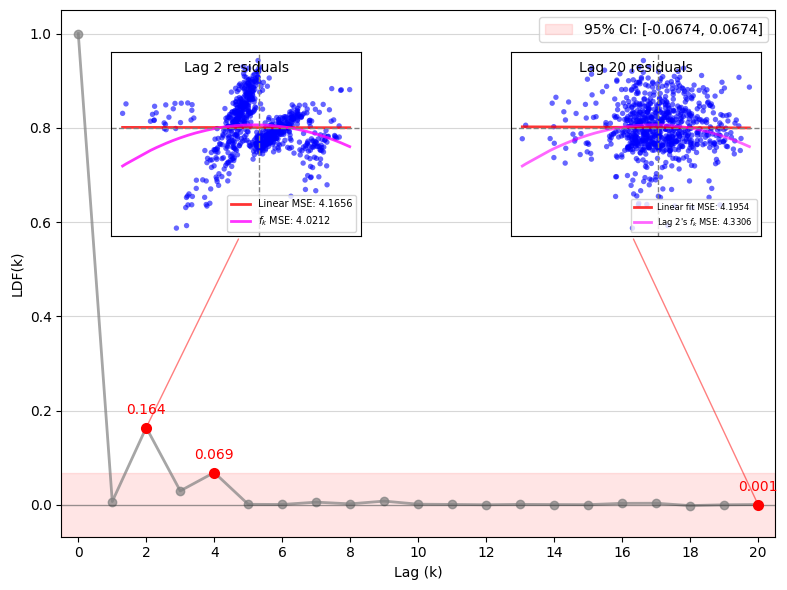

In [62]:
# Create single large plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Main LDF plot
ax.plot([0] + lags, [1] + list(val), 'o-', color='gray', linewidth=2, markersize=6, alpha=0.7)

# Highlight significant points and force lag 20 to be significant
significant_lags = []
significant_values = []
for i, lag in enumerate(lags):
    if abs(val[i]) > ci95 or lag == 20:  # Force lag 20 to be highlighted
        ax.scatter(lag, val[i], color='red', zorder=5, linewidth=2)
        ax.annotate(f'{val[i]:.3f}', 
                   xy=(lag, val[i]), 
                   xytext=(0, 10 if val[i] > 0 else -25), 
                   textcoords='offset points',
                   fontsize=10,
                   color='red',
                   ha='center')
        significant_lags.append(lag)
        significant_values.append(abs(val[i]))

ax.axhline(0, color='black', linestyle='-', alpha=0.3, linewidth=1)
ax.axhspan(-ci95, ci95, alpha=0.1, color='red', label=f'95% CI: [{-ci95:.4f}, {ci95:.4f}]')

ax.set_xlabel('Lag (k)')
ax.set_ylabel('LDF(k)')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.5, axis='y')
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-ci95, 1.05)

# Inset 1: Lag 2 residuals
lag_2 = 2
e_t_2 = residuals[lag_2:]
e_t_lag_2 = residuals[:-lag_2]

ax_inset1 = ax.inset_axes([0.07, 0.57, 0.35, 0.35])
ax_inset1.scatter(e_t_lag_2, e_t_2, alpha=0.6, s=15, color='blue', edgecolor='none')

# Add polynomial regression for lag 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

poly_model_2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

X_sort_idx_2 = np.argsort(e_t_lag_2)
X_sorted_2 = e_t_lag_2[X_sort_idx_2].reshape(-1, 1)
y_sorted_2 = e_t_2[X_sort_idx_2]

# Polynomial fit
poly_model_2.fit(X_sorted_2, y_sorted_2)
y_trend_2 = poly_model_2.predict(X_sorted_2)
mse_poly_2 = mean_squared_error(y_sorted_2, y_trend_2)

# Linear fit
linear_model_2 = LinearRegression()
linear_model_2.fit(X_sorted_2, y_sorted_2)
y_linear_2 = linear_model_2.predict(X_sorted_2)
mse_linear_2 = mean_squared_error(y_sorted_2, y_linear_2)

ax_inset1.plot(X_sorted_2.flatten(), y_linear_2, 'red', linewidth=2, alpha=0.8, linestyle='-', label=f'Linear MSE: {mse_linear_2:.4f}')
ax_inset1.plot(X_sorted_2.flatten(), y_trend_2, 'magenta', linewidth=2, alpha=0.8, label=f'$f_k$ MSE: {mse_poly_2:.4f}')
ax_inset1.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_inset1.axvline(0, color='gray', linestyle='--', linewidth=1)
ax_inset1.set_xticks([])
ax_inset1.set_yticks([])
ax_inset1.text(0.5, 0.95, f'Lag {lag_2} residuals', transform=ax_inset1.transAxes, ha='center', va='top', fontsize=10)
ax_inset1.legend(loc='lower right', fontsize=7)

# Inset 2: Lag 20 residuals
lag_20 = 20
e_t_20 = residuals[lag_20:]
e_t_lag_20 = residuals[:-lag_20]

ax_inset2 = ax.inset_axes([0.63, 0.57, 0.35, 0.35])
ax_inset2.scatter(e_t_lag_20, e_t_20, alpha=0.6, s=15, color='blue', edgecolor='none')

# Add polynomial regression for lag 20
poly_model_20 = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

X_sort_idx_20 = np.argsort(e_t_lag_20)
X_sorted_20 = e_t_lag_20[X_sort_idx_20].reshape(-1, 1)
y_sorted_20 = e_t_20[X_sort_idx_20]

# Polynomial fit
poly_model_20.fit(X_sorted_20, y_sorted_20)
y_trend_20 = poly_model_20.predict(X_sorted_20)
mse_poly_20 = mean_squared_error(y_sorted_20, y_trend_20)

# Linear fit
linear_model_20 = LinearRegression()
linear_model_20.fit(X_sorted_20, y_sorted_20)
y_linear_20 = linear_model_20.predict(X_sorted_20)
mse_linear_20 = mean_squared_error(y_sorted_20, y_linear_20)

# Apply lag 2's polynomial model to lag 20 data for comparison
y_trend_2_on_20 = poly_model_2.predict(X_sorted_20)
mse_lag2_model_on_20 = mean_squared_error(y_sorted_20, y_trend_2_on_20)

ax_inset2.plot(X_sorted_20.flatten(), y_linear_20, 'red', linewidth=2, alpha=0.8, linestyle='-', label=f'Linear fit MSE: {mse_linear_20:.4f}')
ax_inset2.plot(X_sorted_20.flatten(), y_trend_2_on_20, 'magenta', linewidth=2, alpha=0.6, linestyle='-', label=f"Lag 2's $f_k$ MSE: {mse_lag2_model_on_20:.4f}")
ax_inset2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_inset2.axvline(0, color='gray', linestyle='--', linewidth=1)
ax_inset2.set_xticks([])
ax_inset2.set_yticks([])
ax_inset2.text(0.5, 0.95, f'Lag {lag_20} residuals', transform=ax_inset2.transAxes, ha='center', va='top', fontsize=10)
ax_inset2.legend(loc='lower right', fontsize=6)

# Add connection lines from main plot points to insets
# Connection from lag 2 point to inset 1
lag_2_val = val[lag_2-1]  # val is 0-indexed for lags 1-20
ax.annotate('', xy=(0.25, 0.57), xytext=(lag_2, lag_2_val), 
            xycoords='axes fraction', textcoords='data',
            arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, linewidth=1))

# Connection from lag 20 point to inset 2
lag_20_val = val[lag_20-1]  # val is 0-indexed for lags 1-20
ax.annotate('', xy=(0.80, 0.57), xytext=(lag_20, lag_20_val), 
            xycoords='axes fraction', textcoords='data',
            arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, linewidth=1))

plt.tight_layout()
plt.savefig('plots/part5_ldf_with_insets.png')
plt.show()